<h1><center>Using Zach_OPTIMIZER to Check Temporal Resolution</center></h1>

In [1]:
#==========Imports==========
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const
import time
from scipy import interpolate
import Zach_OPTIMIZER.EBMFunctions as opt

import Bell_EBM as ebm

In [2]:
#==========Set Up System==========
planet = ebm.Planet(rad=1.900*const.R_jup.value, mass=1.470*const.M_jup.value,
                    Porb=1.09142030, a=0.02340*const.au.value, inc=83.37, vWind=5e3, nlat = 16, e=0.1)
star = ebm.Star(teff=6300., rad=1.59, mass=1.20)
system = ebm.System(star, planet)

### Use CreateBaseline function to create a high temporal resolution baseline
##### We feed the star and planet into the function and also a fixed spacial resolution of 16, the function then returns us the times, maps, and lightcurve or the baseline

In [4]:
blt, blm, blc = opt.CreateBaseline(star,planet,spacial=16, orbit=1, temporal=10000)

### Create a test array of 10 points
##### We keep a fixed spacial resolution of 16 to match the baseline, we test temporal resolution from 100 to 1000

In [5]:
p = np.zeros(shape=((10),2))
p[:,1]=16
for i in range(0,10):
    p[i,0] = (i*100)+100
p

array([[ 100.,   16.],
       [ 200.,   16.],
       [ 300.,   16.],
       [ 400.,   16.],
       [ 500.,   16.],
       [ 600.,   16.],
       [ 700.,   16.],
       [ 800.,   16.],
       [ 900.,   16.],
       [1000.,   16.]])

### Run tests on the data points we created
##### We pass in the planet, the star, the points we created, the baseline lightcurve, and the baseline times. The function returns us the last created lightcurve (used mostly for debugging) and the data set associated with the test

In [6]:
lc, data = opt.RunTests(star,planet,p,blc,blt)

In [7]:
data

array([[ 100.        ,   16.        ,   89.42294121,   28.38787926],
       [ 200.        ,   16.        ,  180.25326729,   20.88176724],
       [ 300.        ,   16.        ,  312.32213974,   18.64370259],
       [ 400.        ,   16.        ,  488.90686035,   17.68057693],
       [ 500.        ,   16.        ,  675.54092407,   17.11575401],
       [ 600.        ,   16.        ,  848.35910797,   16.80718175],
       [ 700.        ,   16.        , 1066.57409668,   16.5745598 ],
       [ 800.        ,   16.        , 1451.23195648,   16.37195366],
       [ 900.        ,   16.        , 1602.77986526,   16.22879438],
       [1000.        ,   16.        , 2418.22910309,   16.12327209]])

### Lets check out some graphs!

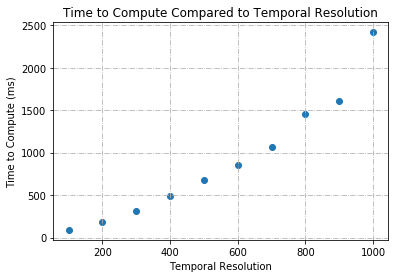

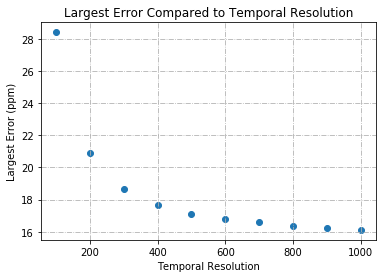

In [8]:
y = data[:,2]
x = data[:,0]
plt.scatter(x, y)
plt.xlabel("Temporal Resolution")
plt.ylabel("Time to Compute (ms)")
plt.title('Time to Compute Compared to Temporal Resolution')
plt.grid(True, linestyle='-.')
plt.show()

y = data[:,3]
x = data[:,0]
plt.scatter(x, y)
plt.xlabel("Temporal Resolution")
plt.ylabel("Largest Error (ppm)")
plt.title('Largest Error Compared to Temporal Resolution')
plt.grid(True, linestyle='-.')
plt.show()

<h1><center>Lightcurves at Low Time Resolution (WIP)</center></h1>

In [23]:
#==========Tester Module==========

nOrbits = 1 #Number of orbits
#T0 = 0.3*Teq*np.cos(system.planet.map.lonGrid)+0.5*Teq
Teq = system.get_teq()
T0 = np.ones_like(system.planet.map.values)*Teq
t0 = 0.
t1 = t0+system.planet.Porb*nOrbits

#==========LowResAlpha Creation==========
aUpdates = 20000. #Amount of timesteps in baseline

dt = system.planet.Porb/aUpdates
alphaMaps, alphattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
alphaLightcurve = system.lightcurve()

#==========LowResBeta Creation==========
bUpdates = 10000. #Amount of timesteps in baseline

dt = system.planet.Porb/bUpdates
betaMaps, betattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
betaLightcurve = system.lightcurve()

#==========LowResCharlie Creation==========
cUpdates = 5000. #Amount of timesteps in baseline

dt = system.planet.Porb/cUpdates
charlieMaps, charliettc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
charlieLightcurve = system.lightcurve()

#==========LowResDelta Creation==========
dUpdates = 2500. #Amount of timesteps in baseline

dt = system.planet.Porb/dUpdates
deltaMaps, deltattc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
deltaLightcurve = system.lightcurve()

#==========LowResEcho Creation==========
eUpdates = 1000. #Amount of timesteps in baseline

dt = system.planet.Porb/eUpdates
echoMaps, echottc = system.run_model_tester(T0, t0, t1, dt, verbose=False)
echoLightcurve = system.lightcurve()

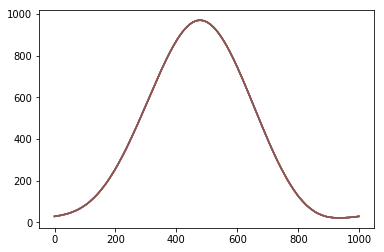

In [25]:
plt.plot((baselineLightcurve)*1e6)
plt.plot((alphaLightcurve)*1e6)
plt.plot((betaLightcurve)*1e6)
plt.plot((charlieLightcurve)*1e6)
plt.plot((deltaLightcurve)*1e6)
plt.plot((echoLightcurve)*1e6)

Alpha ttc: 4405.407905578613 ms
Beta ttc: 2435.30535697937 ms
Charlie ttc: 1108.577013015747 ms
Delta ttc: 568.0687427520752 ms
Echo ttc: 225.3708839416504 ms


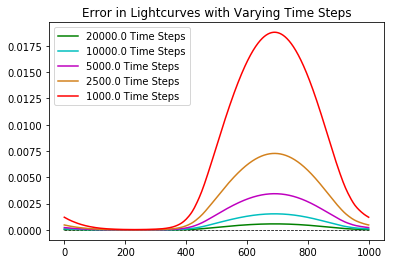

In [26]:
#baselineLightcurve, testLightcurve, baselineLightcurve - testLightcurve
plt.plot((baselineLightcurve-baselineLightcurve)*1e6, 'k', linestyle = "--", lw=0.75)
plt.plot((baselineLightcurve-alphaLightcurve)*1e6, 'g', label = (str(aUpdates) + ' Time Steps'))
plt.plot((baselineLightcurve-betaLightcurve)*1e6, "c", label = (str(bUpdates) + ' Time Steps'))
plt.plot((baselineLightcurve-charlieLightcurve)*1e6, 'm', label = (str(cUpdates) + ' Time Steps'))
plt.plot((baselineLightcurve-deltaLightcurve)*1e6, color='#d3811d', label = (str(dUpdates) + ' Time Steps'))
plt.plot((baselineLightcurve-echoLightcurve)*1e6, 'r', label = (str(eUpdates) + ' Time Steps'))
plt.title('Error in Lightcurves with Varying Time Steps')
plt.legend()
print('Alpha ttc: ' + str(alphattc*1e3) + ' ms')
print('Beta ttc: ' + str(betattc*1e3) + ' ms')
print('Charlie ttc: ' + str(charliettc*1e3) + ' ms')
print('Delta ttc: ' + str(deltattc*1e3) + ' ms')
print('Echo ttc: ' + str(echottc*1e3) + ' ms')

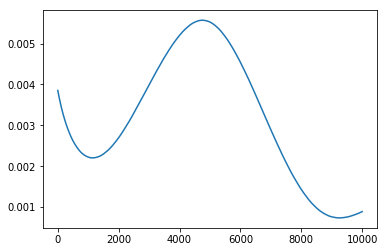

In [17]:
plt.plot(baselineLightcurve)

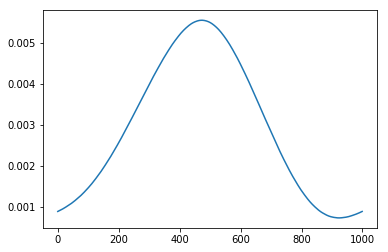

In [20]:
plt.plot(atest)

In [19]:
testLightcurve

array([0.00089088, 0.00089088, 0.00089088, ..., 0.00089088, 0.00089088,
       0.00089088])

Alpha ttc: 16.788005828857422 ms
Beta ttc: 12.228965759277344 ms
Charlie ttc: 10.748147964477539 ms
Deta ttc: 10.499000549316406 ms
Echo ttc: 10.055303573608398 ms


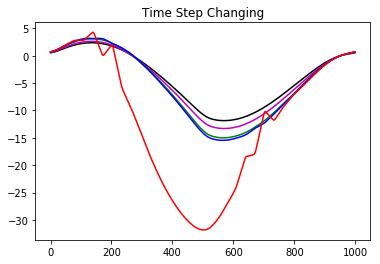